In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
indir = 'tess/all_data/z_normalized/'

In [3]:
sectors = os.listdir(indir)

In [4]:
sectors

['2', '5', '3', '9', '10', '6', '4', '7', '1', '8']

In [5]:
res = {}
for i in sectors:
    sector = str(i)
    c = os.path.join(indir, sector, '*.npy')
    files = glob.glob(c)
    for f in files:
        d = np.load(f)
        t1 = d[0].min()
        t2 = d[0].max()
        l = len(d[0])
        basename = os.path.basename(f)
        summary = {'path': f, 't1': t1, 't2': t2, 'l': l, 'sector': sector}
        res[basename] = summary

In [6]:
df = pd.DataFrame(res).T

In [7]:
df.head()

,path,t1,t2,l,sector
tess2018234235059-s0002-0000000047389361-0121-s_lc.npy,tess/all_data/z_normalized/2/tess2018234235059...,1354.11,1381.48,374,2
tess2018234235059-s0002-0000000281813454-0121-s_lc.npy,tess/all_data/z_normalized/2/tess2018234235059...,1354.11,1381.49,374,2
tess2018234235059-s0002-0000000231053158-0121-s_lc.npy,tess/all_data/z_normalized/2/tess2018234235059...,1354.11,1381.47,374,2
tess2018234235059-s0002-0000000070797900-0121-s_lc.npy,tess/all_data/z_normalized/2/tess2018234235059...,1354.11,1381.47,374,2
tess2018234235059-s0002-0000000051993161-0121-s_lc.npy,tess/all_data/z_normalized/2/tess2018234235059...,1354.11,1381.49,374,2


In [8]:
df.groupby('sector')['l'].unique()

sector
1                                                 [385]
10    [330, 327, 354, 323, 326, 319, 312, 309, 318, ...
2                                                 [374]
3                        [384, 382, 381, 386, 385, 387]
4                                            [319, 320]
5                                            [359, 355]
6                                                 [298]
7                                            [328, 329]
8                                  [291, 288, 290, 287]
9     [319, 300, 315, 328, 320, 316, 318, 331, 322, ...
Name: l, dtype: object

In [9]:
groups=df.groupby(['sector','l'])['path'].apply(lambda x: list(x)).tolist()

In [10]:
len(groups)

45

In [11]:
bs = 100
batches = []
for group in groups:
    mini_batches=[group[i:(i+bs)] for i in range(0, len(group), bs)]
    for b in mini_batches:
        batches.append(b)

In [12]:
len(batches)

1756

In [13]:
batches[1]

['tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000167167306-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000389088085-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000088330115-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000143982389-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000038508010-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000441410194-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000052195290-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000234517168-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000294329266-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000306824150-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/tess2018206045859-s0001-0000000235040302-0120-s_lc.npy',
 'tess/all_data/z_normalized/1/t

In [14]:
current = batches[100]
data = [np.load(x).astype(np.float32) for x in current]

In [16]:
x = torch.FloatTensor(data)

In [17]:
x.shape

torch.Size([100, 2, 385])

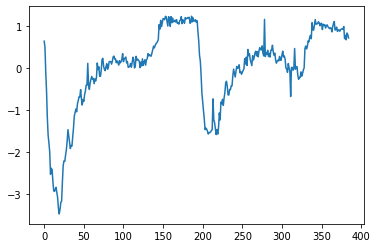

In [35]:
plt.plot(data[11][1])